In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

transaction_data_path = "/content/transaction_data.csv"
purchase_behaviour_path = "/content/purchase_behaviour.csv"

transaction_data = pd.read_csv(transaction_data_path)
purchase_behaviour = pd.read_csv(purchase_behaviour_path)


In [5]:
print("Transaction Data:")
print(transaction_data.head())
print("\nPurchase Behaviour:")
print(purchase_behaviour.head())

Transaction Data:
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  

Purchase Behaviour:
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILI

In [6]:
top_profitable_products = (
    transaction_data.groupby(["PROD_NBR", "PROD_NAME"])["TOT_SALES"]
    .sum()
    .reset_index()
    .sort_values(by="TOT_SALES", ascending=False)
    .head(3)
)

In [7]:
print("\nTop Profitable Products:")
print(top_profitable_products)


Top Profitable Products:
    PROD_NBR                                 PROD_NAME  TOT_SALES
3          4          Dorito Corn Chp     Supreme 380g    40352.0
13        14    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
15        16  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2


In [8]:
customer_loyalty = (
    transaction_data.groupby("LYLTY_CARD_NBR")
    .agg(
        total_spent=("TOT_SALES", "sum"),
        total_purchases=("TXN_ID", "count")  # Assuming each transaction is unique
    )
    .reset_index()
)

In [9]:
customer_loyalty = customer_loyalty.merge(purchase_behaviour, on="LYLTY_CARD_NBR", how="left")


In [10]:
loyal_customer_segment = (
    customer_loyalty.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])
    .agg(
        avg_spent=("total_spent", "mean"),
        avg_purchases=("total_purchases", "mean")
    )
    .reset_index()
    .sort_values(by=["avg_purchases", "avg_spent"], ascending=False)
    .head(3)
)

In [11]:
print("\nTop Loyal Customer Segments:")
print(loyal_customer_segment)


Top Loyal Customer Segments:
        LIFESTAGE PREMIUM_CUSTOMER  avg_spent  avg_purchases
7  OLDER FAMILIES       Mainstream  36.540286       5.031438
6  OLDER FAMILIES           Budget  36.013529       4.954011
8  OLDER FAMILIES          Premium  36.041513       4.921724


<ipython-input-12-ac19f53f0bd7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


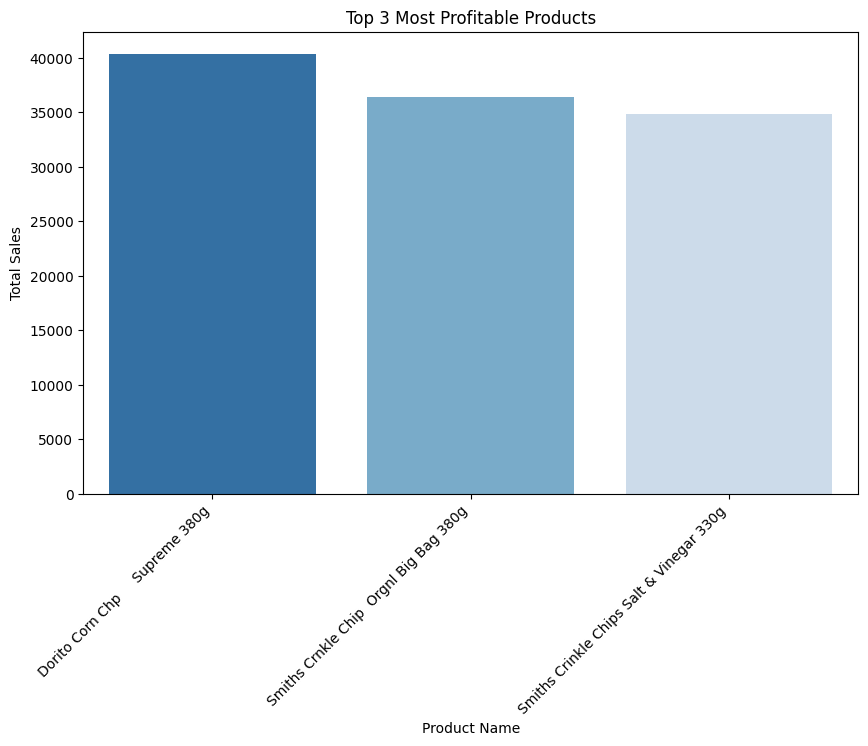

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_profitable_products, x="PROD_NAME", y="TOT_SALES", palette="Blues_r"
)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.title("Top 3 Most Profitable Products")
plt.show()

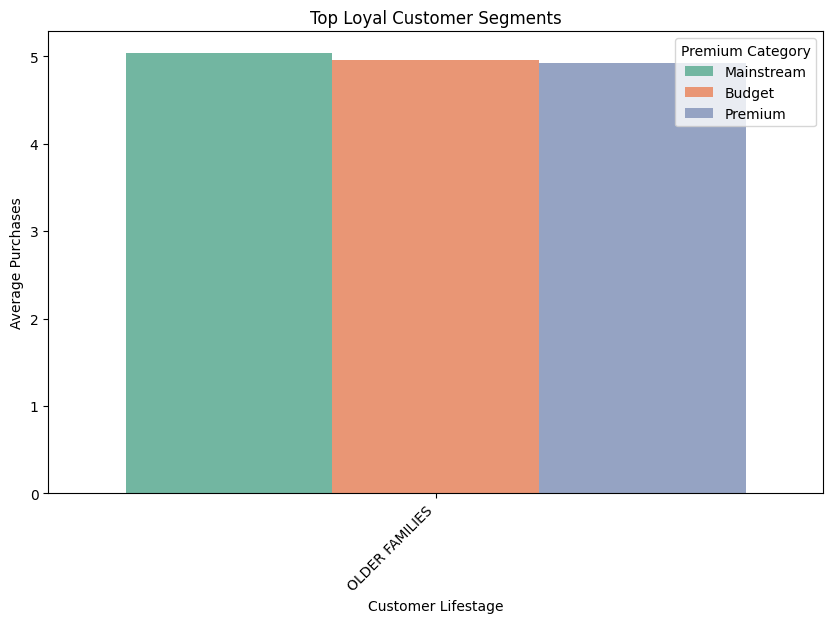

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=loyal_customer_segment, x="LIFESTAGE", y="avg_purchases", hue="PREMIUM_CUSTOMER", palette="Set2"
)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Customer Lifestage")
plt.ylabel("Average Purchases")
plt.title("Top Loyal Customer Segments")
plt.legend(title="Premium Category")
plt.show()


In [14]:
print("\nSummary of Findings:")
print("1. The top 3 most profitable products generate the highest total revenue.")
print("2. The most loyal customer segment consists of 'OLDER FAMILIES' across all premium categories.")
print("3. Older families tend to purchase more frequently and spend more on average.")
print("4. Targeting this segment with personalized marketing strategies can increase revenue.")



Summary of Findings:
1. The top 3 most profitable products generate the highest total revenue.
2. The most loyal customer segment consists of 'OLDER FAMILIES' across all premium categories.
3. Older families tend to purchase more frequently and spend more on average.
4. Targeting this segment with personalized marketing strategies can increase revenue.
